In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
from skimage.filters import median
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening
from skimage.exposure import histogram

In [2]:
def adjust_rotation(image):
    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(image > 0))
    
    angle = cv2.minAreaRect(coords)[-1]
    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)
    # otherwise, just take the inverse of the angle to make
    # it positive
    else:
        angle = -angle

    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated


In [3]:
def show_images(images,titles=None):
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 

In [4]:
def binarizeImage(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    return thresh

In [5]:
def lineIdentifier(img):
    rows=np.sum(img,1)
    y_pos = np.arange(len(rows))
    plt.barh(y_pos, rows, align='center', alpha=0.5)
    plt.xlabel('Sum of pixels')
    plt.title('Row Contribution')
    plt.show()

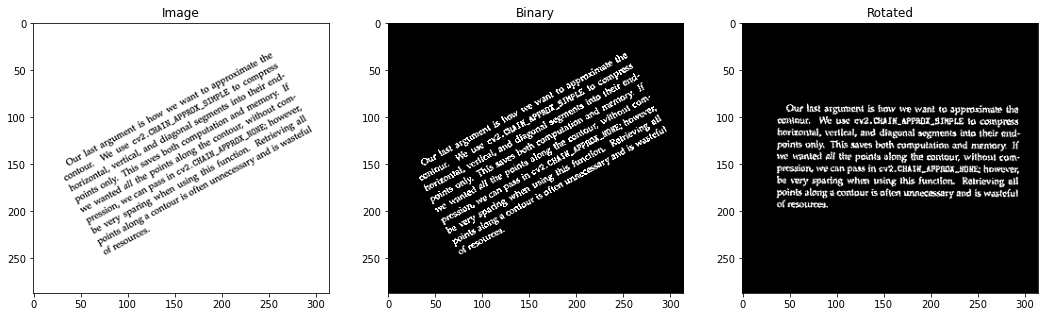

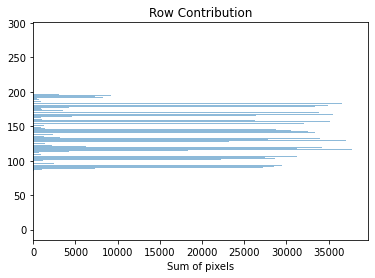

In [6]:
# load the image from disk
image = cv2.imread('f3.png')
# ski_median=skimage.filters.median(image, selem=None, out=None, mode='nearest', cval=0.15, behavior='ndimage')
binary= binarizeImage(image)
rotated=adjust_rotation(binary)

show_images([image,binary,rotated],['Image','Binary','Rotated'])
lineIdentifier(rotated)